In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data10 = np.loadtxt("c++/10.csv", delimiter=" ")
data50 = np.loadtxt("c++/50.csv", delimiter=" ")

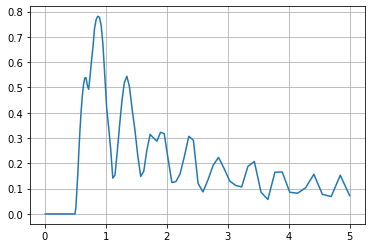

In [10]:
fig, ax = plt.subplots()

ax.plot(data10[:,0], data10[:,1])
ax.plot(data50[:,0], data50[:,1])
ax.grid()
#ax.set_xscale('log')
#ax.set_yscale('log')